## 6. 시계열 데이터 문법

In [2]:
from datetime import datetime
import pandas as pd

In [4]:
df=pd.read_csv('sales_data.csv',encoding='utf-8-sig')
df

,CustomerID,Name,Gender,Age,Country,Product,Category,Price,Quantity,PurchaseDate
0,1001,Alice,Female,25,USA,A101,Phone,500.0,1,2023-01-05 10:23:00
1,1002,Bob,Male,30,UK,B202,Laptop,900.0,1,2022-11-11 16:02:00
2,1003,Charlie,Male,22,Korea,C303,Phone,480.0,2,2023-08-20 13:40:00
3,1004,Daisy,Female,28,USA,D404,Tablet,300.0,1,2023-06-01 08:00:00
4,1005,Ethan,Male,35,Canada,E505,Laptop,NaN,1,2023-03-03 19:15:00


In [22]:
date_str = "06-30-25.csv"

date_str_cl=date_str.replace('.csv','')

dt=datetime.strptime(date_str_cl, "%m-%d-%y")
dt

datetime.datetime(2025, 6, 30, 0, 0)

## 시리즈데이터 시계타입으로 바꾸기

In [26]:
dates = pd.Series(['2024-06-01', '2024-06-15', '2024-06-30'])
dates.dtypes

dtype('O')

In [28]:
dates1=pd.to_datetime(dates,format='%Y-%m-%d')
dates1.dtypes
display(dates1)

0   2024-06-01
1   2024-06-15
2   2024-06-30
dtype: datetime64[ns]

## 날짜형식 바꾸기

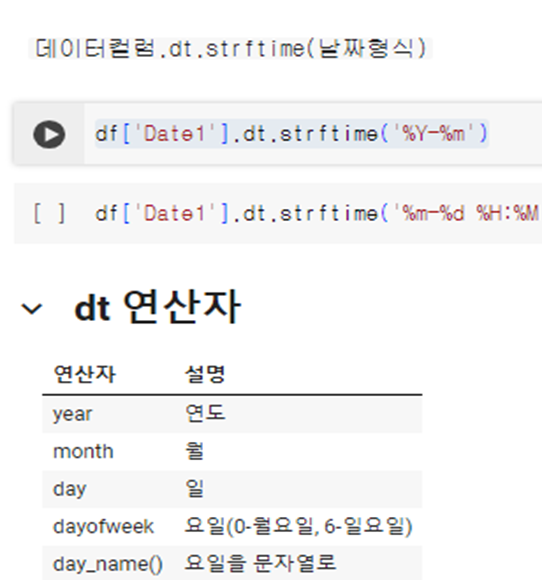

In [10]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [53]:
# 우선적으로 데이터가 시계타입으로 바꿔져야 사용가능
df['PurchaseDate'].dt.strftime('%Y-%m')

0    2023-01
1    2022-11
2    2023-08
3    2023-06
4    2023-03
Name: PurchaseDate, dtype: object

## 시계타입에 접근

In [14]:
display(df['PurchaseDate'].dt.year
,df['PurchaseDate'].dt.day
,df['PurchaseDate'].dt.month)

0    2023
1    2022
2    2023
3    2023
4    2023
Name: PurchaseDate, dtype: int32

0     5
1    11
2    20
3     1
4     3
Name: PurchaseDate, dtype: int32

0     1
1    11
2     8
3     6
4     3
Name: PurchaseDate, dtype: int32

## 날짜 계산

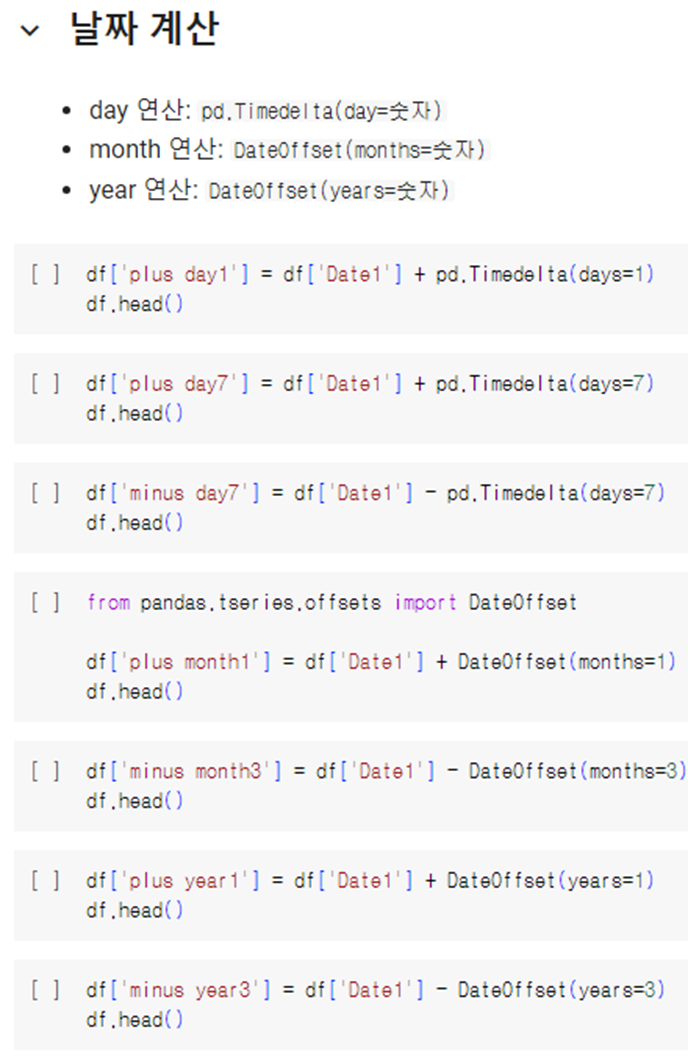

In [58]:
df['PurchaseDate']+pd.Timedelta(days=1)

0   2023-01-06 10:23:00
1   2022-11-12 16:02:00
2   2023-08-21 13:40:00
3   2023-06-02 08:00:00
4   2023-03-04 19:15:00
Name: PurchaseDate, dtype: datetime64[ns]

In [62]:
df['PurchaseDate']+pd.DateOffset(months=1)

0   2023-02-05 10:23:00
1   2022-12-11 16:02:00
2   2023-09-20 13:40:00
3   2023-07-01 08:00:00
4   2023-04-03 19:15:00
Name: PurchaseDate, dtype: datetime64[ns]

### 다른 칼럼끼리 날짜계산

In [42]:
(df['PurchaseDate'].iloc[0:3]-dates1).dt.days

0   -513
1   -582
2   -315
dtype: int64

In [44]:
df['PurchaseDate'].iloc[0:3]-dates1

0   -513 days +10:23:00
1   -582 days +16:02:00
2   -315 days +13:40:00
dtype: timedelta64[ns]

In [55]:
df['PurchaseDate'].dt.month-dates1.dt.month

0   -5.0
1    5.0
2    2.0
3    NaN
4    NaN
dtype: float64

## 날짜 그룹화

In [62]:
display(df['PurchaseDate'].dt.to_period('M')
,df['PurchaseDate'].dt.to_period('A'),
df['PurchaseDate'].dt.to_period('Q'))

C:\Users\82104\AppData\Local\Temp\ipykernel_16892\3820097357.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  ,df['PurchaseDate'].dt.to_period('A'),


0    2023-01
1    2022-11
2    2023-08
3    2023-06
4    2023-03
Name: PurchaseDate, dtype: period[M]

0    2023
1    2022
2    2023
3    2023
4    2023
Name: PurchaseDate, dtype: period[Y-DEC]

0    2023Q1
1    2022Q4
2    2023Q3
3    2023Q2
4    2023Q1
Name: PurchaseDate, dtype: period[Q-DEC]

## 날짜구간생성

In [68]:
pd.date_range(start='2024-01-01', periods=5, freq='D') ## freq= D,W,M 가능 

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')

## 슬라이딩 윈도우 EX 기간이동평균
###  df['컬럼명'].rolling(창크기).집계함수()

In [71]:
df1 = pd.DataFrame({
    'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})
df1.set_index('date', inplace=True)

In [75]:
df1

,value
date,
2024-01-01,1
2024-01-02,2
2024-01-03,3
2024-01-04,4
2024-01-05,5
2024-01-06,6
2024-01-07,7
2024-01-08,8
2024-01-09,9


In [84]:
# 3일 평균값 
display(df1.rolling(3).mean())

# 7일 평균값
display(df1.rolling(7).mean())

,value
date,
2024-01-01,NaN
2024-01-02,NaN
2024-01-03,2.0
2024-01-04,3.0
2024-01-05,4.0
2024-01-06,5.0
2024-01-07,6.0
2024-01-08,7.0
2024-01-09,8.0


,value
date,
2024-01-01,NaN
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-06,NaN
2024-01-07,4.0
2024-01-08,5.0
2024-01-09,6.0


## Series.shift(n) 또는 df['컬럼'].shift(n) 이란?
데이터를 위 또는 아래로 n행 밀어주는 함수
주로 이전 행의 값(전일값, 전주값, 전월값 등)을 참고할 때 사용함

In [90]:
df1['value2']=df1['value'].shift(2)

In [92]:
df1

,value,value2
date,,
2024-01-01,1,NaN
2024-01-02,2,NaN
2024-01-03,3,1.0
2024-01-04,4,2.0
2024-01-05,5,3.0
2024-01-06,6,4.0
2024-01-07,7,5.0
2024-01-08,8,6.0
2024-01-09,9,7.0
